In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
# Sample sales data 
data = {
    "Weeks": pd.date_range(start="2023-01-01", periods=10, freq="W"),
    "Sales": [120, 135, 150, 160, 175, 185, 190, 200, 220, 240]
}


In [4]:
df = pd.DataFrame(data)

In [5]:
df.set_index("Weeks", inplace=True)


In [6]:
# Train ARIMA model
model = ARIMA(df["Sales"], order=(2,1,2))  # (p,d,q) parameters can be tuned
model_fit = model.fit()


/home/wsl/miniconda3/envs/PYT/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/home/wsl/miniconda3/envs/PYT/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/home/wsl/miniconda3/envs/PYT/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/home/wsl/miniconda3/envs/PYT/lib/python3.13/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/wsl/miniconda3/envs/PYT/lib/python3.13/site-packages

In [7]:
# Make forecast
df["Forecast"] = model_fit.predict(start=2, end=len(df)+5)

In [9]:
# Drop rows where 'Forecast' is NaN in both columns
df_filtered = df.dropna(subset=["Forecast"])

In [10]:
# Evaluate performance
mae = mean_absolute_error(df_filtered["Sales"], df_filtered["Forecast"])
rmse = np.sqrt(mean_squared_error(df_filtered["Sales"], df_filtered["Forecast"]))

print(f"ARIMA Model - MAE: {mae}, RMSE: {rmse}")

ARIMA Model - MAE: 3.7250772315144083, RMSE: 4.587142808758822


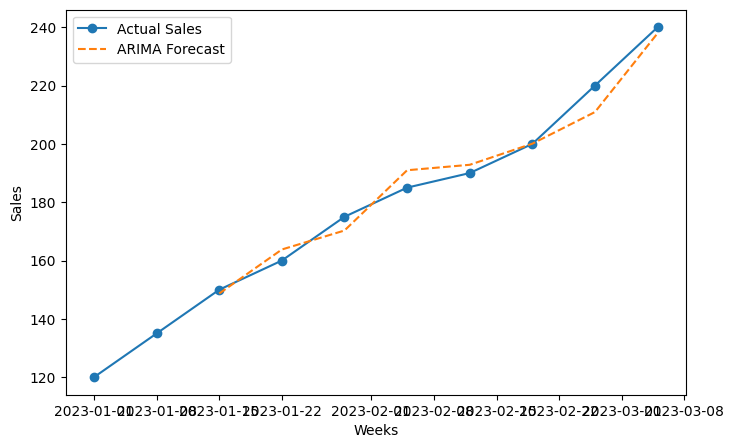

In [11]:
# Plot actual vs predicted
plt.figure(figsize=(8,5))
plt.plot(df.index, df["Sales"], label="Actual Sales", marker="o")
plt.plot(df.index, df["Forecast"], label="ARIMA Forecast", linestyle="dashed")
plt.xlabel("Weeks")
plt.ylabel("Sales")
plt.legend()
plt.show()